# KNN model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

### Prepare data

In [15]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

### Create test train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Create model

In [16]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [19]:
knn_model.predict(X_test)

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ,  325.5   ,
        216.5   ,  101.5   ,  982.    ,  886.6666,  590.    ,  901.6666,
        831.6666,  157.5   ,  393.    , 1005.    ,  735.5   ,   97.    ,
        884.4   ,  302.    ,  450.    ,  817.6666,  832.6666,  392.3334,
        528.    ,   81.6   ,  735.    ,  470.    ,  722.5   ,  101.    ,
         90.5   ,   74.6   ,  748.3334,  217.    ,  280.5334, 1044.5   ,
        955.    ,  232.    ,   78.6   ,  529.    ,   77.6   ,  106.5   ,
        516.6666,  593.6666, 1005.    ,  649.1666,  715.    ,  101.5   ,
        134.5   ,  810.    ,  743.    ,  521.3334,  664.3334,  195.    ,
        102.4   ,  728.5   ,  488.    ,  962.5   ,  230.8334, 1040.    ,
        885.    ,  542.    ,  720.4   ,  571.    ,  735.    ,   81.6   ])

### Analyze differences between validated model and hard coded defined model.

In [35]:
from sklearn.model_selection import cross_val_score

In [45]:
RMSE = []
RMSE_CV = []

for k in range(10):
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    rmse_cv = np.sqrt(-1 * cross_val_score(knn_model, X_train, y_train, scoring='neg_mean_squared_error').mean())
    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)
    print("k: ", k,  'RMSE: ', rmse, ', RMSE_CV: ', rmse_cv)

k:  1 RMSE:  0.0 , RMSE_CV:  346.07307722447337
k:  2 RMSE:  179.52761335480352 , RMSE_CV:  308.98084737929224
k:  3 RMSE:  205.20157172291863 , RMSE_CV:  286.51051892002596
k:  4 RMSE:  220.5139794876305 , RMSE_CV:  286.2869859874586
k:  5 RMSE:  239.64671325413764 , RMSE_CV:  289.6292034852988
k:  6 RMSE:  243.5904190007242 , RMSE_CV:  300.1901906442359
k:  7 RMSE:  258.1478781634636 , RMSE_CV:  301.7311367411422
k:  8 RMSE:  266.05374203349805 , RMSE_CV:  304.2703477242073
k:  9 RMSE:  269.73782093553376 , RMSE_CV:  301.2484957122238
k:  10 RMSE:  271.2798300436963 , RMSE_CV:  303.7765504213008


### Model tuning

In [20]:
from sklearn.model_selection import GridSearchCV

In [22]:
knn_params = {
    'n_neighbors': np.arange(1, 30, 1)
}

In [24]:
knn_params

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}

In [25]:
knn = KNeighborsRegressor()

In [26]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)

In [29]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [46]:
knn_model_tuned = KNeighborsRegressor(knn_cv_model.best_params_.get('n_neighbors'))

In [49]:
knn_model_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [50]:
y_predictions = knn_model_tuned.predict(X_test)

In [52]:
knn_error = np.sqrt(mean_squared_error(y_test, y_predictions))

In [53]:
knn_error

413.7094731463598

# SVR model

In [90]:
from sklearn.svm import SVR

### Prepare data

In [102]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

### Create test, train data

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:
X_train = pd.DataFrame(X_train.Hits)
X_test = pd.DataFrame(X_test.Hits)

In [227]:
svr_model = SVR(kernel='linear')

In [228]:
svr_model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [229]:
y_pred = svr_model.predict(X_test)

In [230]:
y_pred[0:10]

array([627.15609756, 681.82073171, 627.15609756, 428.37560976,
       155.05243902, 294.19878049, 781.21097561, 691.7597561 ,
       741.45487805, 299.16829268])

In [231]:
svr_error = np.sqrt(mean_squared_error(y_test, y_pred))
svr_error

459.0187960365147

In [232]:
interception = svr_model.intercept_[0]
coefficient = svr_model.coef_[0][0]
print('y = {0} + {1} * x'.format(interception, coefficient))

y = -48.69756097561513 + 4.969512195122093 * x


### Simply validate result for first prediction

In [233]:
first_obs = X_train['Hits'][0:1].values[0]
result_from_equation = interception + coefficient * first_obs
result_from_equation

403.5280487804953

In [234]:
y_pred[0]

627.1560975609794

In [235]:
import matplotlib.pyplot as plt

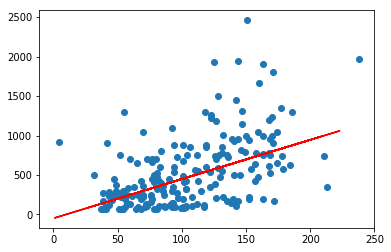

In [236]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red');

### Get predictions from LinearRegression model

In [237]:
from sklearn.linear_model import LinearRegression

In [238]:
linear_model = LinearRegression().fit(X_train, y_train)

In [239]:
lm_pred = linear_model.predict(X_test)

In [240]:
lm_pred[0:10]

array([694.63993894, 751.53695643, 694.63993894, 487.74169352,
       203.25660607, 348.08537787, 854.98607914, 761.8818687 ,
       813.60643006, 353.257834  ])

In [241]:
lm_interception = linear_model.intercept_
lm_coef = linear_model.coef_[0]
print('y = {0} + {1} * x'.format(lm_interception, lm_coef))

y = -8.814095480334572 + 5.1724561354706875 * x


### Reason of the difference betweeen SVR model and LinearRegression model is that SVR is not getting affected by outliers much

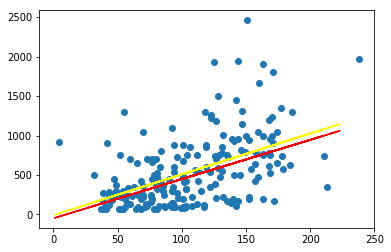

In [242]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color = 'red');
plt.plot(X_test, lm_pred, color = 'yellow')

### Model tuning

In [243]:
svr_params = {
    'C': np.arange(0.1, 2, 0.1)
}

### GridSearchCV instance can be used as SVR model

In [244]:
svr_model_cv = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train, y_train)

In [245]:
svr_model_cv.predict(X_test)[0:10]

array([620.26418033, 674.06202459, 620.26418033, 424.63565574,
       155.64643443, 292.58640164, 771.87628689, 683.84345082,
       732.75058197, 297.47711475])

In [246]:
svr_model_cv.best_params_

{'C': 0.1}

In [257]:
svr_model_tuned = SVR('linear', C=svr_model_cv.best_params_['C']).fit(X_train, y_train)

In [258]:
y_tuned_pred = svr_model_tuned.predict(X_test)

In [261]:
svr_tuned_error = np.sqrt(mean_squared_error(y_test, y_tuned_pred))
svr_tuned_error

458.198966781116

### Create model with all variables

In [262]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [268]:
svr_model1 = SVR('linear')
svr_params = {
    'C': np.arange(0.1, 2, 0.1)
}

In [271]:
svr_model_cv = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train, y_train)

In [272]:
svr_model_cv.best_params_

{'C': 0.4}

In [273]:
svr_model_tuned1 = SVR('linear', C = svr_model_cv.best_params_['C']).fit(X_train, y_train)

In [274]:
y_pred = svr_model_tuned1.predict(X_test)

In [275]:
svr_error1 = np.sqrt(mean_squared_error(y_test, y_pred))

In [276]:
svr_error1

367.5385297249052

# Non-Linear SVR

### Compare LinearRegression and Non-Linear SVR

In [311]:
np.random.seed(3)

x_rand = np.random.uniform(2, 10, 145)
y_rand = np.sin(x_rand) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5 * np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_rand, x_outliers]))
x_sim = np.concatenate([x_rand, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_rand, y_outliers])[x_sim_idx]

In [333]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(np.sin(x_sim[:, np.newaxis]), y_sim)
lm_pred = lm.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR

svr_model = SVR('rbf').fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr_model.predict(x_sim[:, np.newaxis])

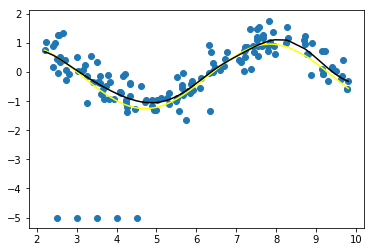

In [346]:
plt.rcParams['axes.facecolor'] = '#FFFFFF'
plt.scatter(x_sim, y_sim)
plt_lm = plt.plot(x_sim, lm_pred, color='yellow')
plt_svr = plt.plot(x_sim, svr_pred, color='black')

### Create model

In [347]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [349]:
svr_model_rbf = SVR('rbf').fit(X_train, y_train)

In [350]:
y_pred = svr_model_rbf.predict(X_test)

In [352]:
svr_model_rbf_error = np.sqrt(mean_squared_error(y_test, y_pred))
svr_model_rbf_error

473.4445984431814

### Model tuning

In [361]:
svr_params = {
    'C': np.arange(0.1, 100, 0.1)
}
svr_model_rbf_cv = GridSearchCV(svr_model_rbf, svr_params, cv=10)
svr_model_rbf_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,...
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             pre

In [363]:
svr_model_rbf_cv.best_params_

{'C': 19.800000000000004}

In [369]:
svr_model_rbf_tuned = SVR('rbf', C=svr_model_rbf_cv.best_params_['C']).fit(X_train, y_train)

In [370]:
y_pred = svr_model_rbf_tuned.predict(X_test)

In [371]:
svr_model_rbf_tuned_error = np.sqrt(mean_squared_error(y_test, y_pred))
svr_model_rbf_tuned_error

472.2131619800523

# Artificial Neural Networks (ANN)

### Create model

In [591]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [592]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [625]:
X_train_scaled = scaler.transform(X_train)

In [631]:
X_test_scaled = scaler.transform(X_test)

In [632]:
from sklearn.neural_network import MLPRegressor

In [633]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [634]:
y_pred = mlp_model.predict(X_test_scaled)

In [635]:
mlp_model_error = np.sqrt(mean_squared_error(y_test, y_pred))
mlp_model_error

657.8679789135332

### Model tuning

In [515]:
mlp_params = {
    'activation': [
        'identity', 
        'logistic', 
        'tanh',
        'relu'
    ],
    'alpha': np.arange(0.0001, 0.5, 0.01),   
}
ann_model_cv = GridSearchCV(mlp_model, mlp_params, cv=10).fit(X_train_scaled, y_train)

In [516]:
mlp_model_cv.best_params_

{'activation': 'identity', 'alpha': 0.10010000000000001}

In [535]:
mlp_model_tuned = MLPRegressor(activation='relu', alpha=0.02)

In [636]:
mlp_model_tuned.fit(X_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [637]:
y_pred = mlp_model_tuned.predict(X_test_scaled)

In [638]:
mlp_model_tuned_error = np.sqrt(mean_squared_error(y_test, y_pred))
mlp_model_tuned_error

655.3066925543594

# Classification and Regression Trees (CART)

### Create model

In [4]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
cart_model = DecisionTreeRegressor()

In [7]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [8]:
y_pred = cart_model.predict(X_test)

In [9]:
cart_model_error = np.sqrt(mean_squared_error(y_test, y_pred))
cart_model_error

448.20593773993374

### Model tuning

In [15]:
cart_params = {
    'min_samples_split': range(2, 100),
    'max_leaf_nodes': range(2, 100)
}

In [16]:
from sklearn.model_selection import GridSearchCV
cart_model_cv = GridSearchCV(cart_model, cart_params, cv=10).fit(X_train, y_train)

In [17]:
cart_model_cv.best_params_

{'max_leaf_nodes': 30, 'min_samples_split': 37}

In [18]:
min_samples_split = cart_model_cv.best_params_['min_samples_split']
max_leaf_nodes = cart_model_cv.best_params_['max_leaf_nodes']
cart_model_tuned = DecisionTreeRegressor(min_samples_split=min_samples_split, max_leaf_nodes=max_leaf_nodes)

In [19]:
cart_model_tuned.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=30, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=37, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [20]:
y_pred = cart_model_tuned.predict(X_test)
cart_model_tuned_error = np.sqrt(mean_squared_error(y_test, y_pred))
cart_model_tuned_error

375.01595709815194

# Bagged Trees

### Create model

In [37]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
from sklearn.ensemble import BaggingRegressor

In [38]:
bagging_model = BaggingRegressor(bootstrap_features = True)

In [39]:
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [28]:
bagging_model.n_estimators

10

In [29]:
bagging_model.n_features_

19

In [30]:
bagging_model.estimators_samples_

[array([141, 113, 121,  12,  12, 118,  23, 157,  30,  12,  16,  49,  14,
         57, 136, 115, 158, 182,  34,  72,  13,  79, 108,  18, 185, 163,
         30, 149, 177,  92, 181,  25,  26,  98,  65, 101, 103, 167, 112,
         24, 141,  72, 178, 174, 105,  94, 117,  72, 123, 139,  30, 159,
         42, 178, 132, 193, 140,  95,  42,  24,  29, 141, 168, 192,  18,
        137, 165, 113, 170, 105, 124,  39, 131,  32,  98,  71, 128,  14,
         80,  97, 113,  39, 155,  31,  78, 173, 131, 192, 111, 108, 144,
        173,  21,  59,  81, 122,   3,  36,   0,  85,  12,  38, 121, 173,
         35, 135,  73, 120, 104,   9, 141,  81, 188,  72,  75, 171, 124,
        175,  62, 137, 149,  64,  37, 146, 133,  92,  74,  34, 100,  82,
         67,  43,  29, 136,  25,  92, 121, 159, 149,  87,  79, 154,  93,
        102,  24, 196, 174,   5, 111,  80,  55,  34, 185,  70, 196, 101,
        148, 155, 151,  11, 128, 169, 145, 129,  99, 120,  65, 106,  88,
        126, 154,  56,   6, 145,  59,  42,  26, 157

In [33]:
bagging_model.estimators_features_

[array([16,  6,  1, 13, 16, 13, 12, 12,  0,  9,  2, 17,  2,  9,  0,  2, 17,
         3, 13]),
 array([ 8,  8, 14, 10,  5, 11,  8, 12,  3,  0,  6, 11,  2,  7,  0,  4, 14,
        17,  1]),
 array([ 7,  7, 14, 11, 10, 16, 18,  9, 17, 15,  6,  2,  6,  5, 18, 13, 10,
        15,  5]),
 array([10, 18, 14, 17, 11,  5,  6, 15, 10, 13,  9, 12,  4, 18,  9, 11, 13,
         3,  5]),
 array([10,  3,  7,  8,  1, 14,  3,  2, 11,  4,  3,  5,  9,  7,  8, 18,  4,
         3, 15]),
 array([ 5, 10, 16, 14, 18,  7,  5,  5, 10,  6,  0,  0,  8,  3,  8,  3, 10,
        11,  6]),
 array([13, 15,  2, 18, 15, 12,  6, 14,  4, 18,  3,  3,  9, 15,  2,  5,  2,
        18, 11]),
 array([ 8, 12,  9, 18, 12, 11,  4, 17,  8,  1, 17,  0,  5, 10, 18, 11, 13,
        18, 13]),
 array([ 2, 17,  9,  0,  8,  1, 13,  1, 15, 11,  1, 16, 10,  0,  4, 17, 10,
        12,  5]),
 array([ 6,  9,  7, 18,  0,  9,  4, 11, 10,  9, 16,  4, 15, 11,  6,  6,  5,
         5,  9])]

In [34]:
bagging_model.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1273515749, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=273774533, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_w

In [40]:
y_pred = bagging_model.predict(X_test)

In [41]:
bagging_model_error = np.sqrt(mean_squared_error(y_test, y_pred))
bagging_model_error

364.10531204991423

In [42]:
y_pred_2 = bagging_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [44]:
np.sqrt(mean_squared_error(y_test, y_pred_2))

461.35000070691746

In [45]:
y_pred_3 = bagging_model.estimators_[2].fit(X_train, y_train).predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred_3))

529.1185031110706

In [53]:
for i in range(10):
        model = bagging_model.estimators_[i].fit(X_train, y_train)
        predictions = model.predict(X_test)
        model_error = np.sqrt(mean_squared_error(y_test, predictions))
        total += model_error
        print('Model {0}`s error: {1}'.format(i + 1, model_error))    

Model 1`s error: 533.1550151389681
Model 2`s error: 461.35000070691746
Model 3`s error: 529.1185031110706
Model 4`s error: 443.05404587379223
Model 5`s error: 519.7134566483378
Model 6`s error: 527.3292100003622
Model 7`s error: 526.4176396574302
Model 8`s error: 527.9266234560271
Model 9`s error: 510.3062406720432
Model 10`s error: 476.48089007516154


### Model tuning

In [54]:
bagging_params = {
    'n_estimators': range(2, 40)
}

In [55]:
bagging_model_cv = GridSearchCV(bagging_model, bagging_params, cv = 10)

In [56]:
bagging_model_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=True,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'n_estimators': range(2, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
bagging_model_cv.best_params_

{'n_estimators': 14}

In [58]:
bagging_model_tuned = BaggingRegressor(n_estimators=bagging_model_cv.best_params_['n_estimators']).fit(X_train, y_train)

In [59]:
y_pred = bagging_model_tuned.predict(X_test)

In [61]:
bagging_model_tuned_error = np.sqrt(mean_squared_error(y_test, y_pred))
bagging_model_tuned_error

350.171296642062

# Random Forests

### Create model

In [69]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rf_model = RandomForestRegressor(random_state=42)

In [73]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [74]:
y_pred = rf_model.predict(X_test)

In [76]:
rf_model_error = np.sqrt(mean_squared_error(y_test, y_pred))
rf_model_error

373.04044281427

### Model tuning

In [93]:
rf_params = {
    'max_depth': list(range(2, 40)),
    'max_features': list(range(3, 19, 3)),
    'n_estimators': [100, 200, 500, 1000, 2000]
}

In [94]:
rf_model_cv = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1).fit(X_train, y_train)

In [95]:
rf_model_cv.best_params_

{'max_depth': 11, 'max_features': 3, 'n_estimators': 100}

In [99]:
best_params = rf_model_cv.best_params_

rf_model_tuned = RandomForestRegressor(
    random_state=42,
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    n_estimators=best_params['n_estimators']
)
rf_model_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [100]:
y_pred = rf_model_tuned.predict(X_test)

In [101]:
rf_model_tuned_error = np.sqrt(mean_squared_error(y_test, y_pred))
rf_model_tuned_error

338.61994085292304

In [109]:
importances = pd.DataFrame({'Importance': rf_model_tuned.feature_importances_}, index=X_train.columns)

In [131]:
importances.sort_values(by='Importance', ascending=True, inplace=True)

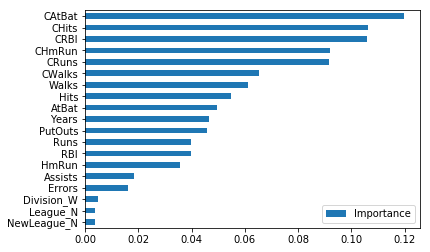

In [133]:
importances.plot.barh()

# Gradient Boosting Machines (GBM)

### Create model

In [134]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [135]:
from sklearn.ensemble import GradientBoostingRegressor

In [142]:
gbm_model = GradientBoostingRegressor()

In [143]:
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [144]:
y_pred = gbm_model.predict(X_test)

In [146]:
gmb_model_error = np.sqrt(mean_squared_error(y_test, y_pred))
gmb_model_error

348.36693700162056

### Model tuning

In [148]:
gbm_params = {
    'learning_rate': [0.1, 0.01, 0.001, 0.2, 0.0001],
    'max_depth': [3, 5, 8, 10, 20, 40, 50, 100, 200],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1, 0.75, 0.5]
}

In [149]:
gbm_model = GradientBoostingRegressor()

In [152]:
gbm_model_cv = GridSearchCV(gbm_model, gbm_params, cv=10, n_jobs=-1, verbose=True)

In [153]:
gbm_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 540 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 28.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [154]:
gbm_model_cv.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}

In [155]:
best_params = gbm_model_cv.best_params_

In [172]:
gbm_model_tuned = GradientBoostingRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample']
).fit(X_train, y_train)

In [173]:
y_pred = gbm_model_tuned.predict(X_test)

In [174]:
gbm_model_tuned_error = np.sqrt(mean_squared_error(y_test, y_pred))
gbm_model_tuned_error

345.10370517486166

# XGBoost

### Create model

In [7]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# !pip install xgboost

    100% |████████████████████████████████| 686kB 1.8MB/s 

In [8]:
import xgboost as xgb
from xgboost import XGBRegressor

In [19]:
xgb_model = XGBRegressor().fit(X_train, y_train)

[14:47:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [20]:
y_pred = xgb_model.predict(X_test)

In [22]:
xgb_error = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_error

359.91750599447033

In [26]:
xgb_params = {
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [2,3,4,5,6],
    'learning_rate': [0.1, 0.001, 0.0001, 0.5]
}

In [27]:
from sklearn.model_selection import GridSearchCV
xgb_model_cv = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=-1, verbose=1)

In [28]:
xgb_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 331 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 831 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 1531 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2431 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3473 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4362 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5115 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 5600 out of 5600 | elapsed:  5.5min finished


[15:01:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1],
                         'learning_rate': [

In [29]:
xgb_model_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [48]:
xgb_model_tuned = XGBRegressor(
    colsample_bytree=0.5,
    learning_rate=0.01,
    max_depth=2,
    n_estimators=1000
).fit(X_train,y_train)

[15:05:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [49]:
y_pred = xgb_model_tuned.predict(X_test)

In [50]:
xgb_tuned_error = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_tuned_error

350.90539627458753

# LightGBM

### Create model

In [2]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
#!pip install lightgbm

In [52]:
from lightgbm import LGBMRegressor

OSError: dlopen(/anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /anaconda3/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [4]:
# conda install -c conda-forge lightgbm

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: done
WARNING conda.core.package_cache_data:_make_single_record(350): Encountered corrupt package tarball at /anaconda3/pkgs/clangdev-4.0.0-default_0.tar.bz2. Conda has removed it, but you need to re-run conda to download it again.

## Package Plan ##

  environment location: /anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    clangdev-4.0.0             |        default_0        62.8 MB  conda-forge
    conda-4.7.11               |           py37_0         3.0 MB  conda-forge
    lightgbm-2.2.3             |   py37h0a44026_0         645 KB  conda-forge
    llvmdev-4.0.0  

In [3]:
from lightgbm import LGBMRegressor

In [5]:
lgbm_model = LGBMRegressor().fit(X_train, y_train)

In [12]:
y_pred = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration_)

In [13]:
lgbm_error = np.sqrt(mean_squared_error(y_test, y_pred))
lgbm_error

363.8712087611089

# Model tuning

In [15]:
lgbm_params = {
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1],
    'n_estimators': [100, 200, 500, 1000, 2000],
    'max_depth': [2,3,4,5,6, 7, 8],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.5]
}

In [17]:
from sklearn.model_selection import GridSearchCV
lgbm_model_cv = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=True)

In [18]:
lgbm_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 1225 candidates, totalling 12250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 8040 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 9940 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 12040 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 12250 out of 12250 | elapsed:  9.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.5],
                

In [19]:
lgbm_model_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 200}

In [41]:
lgbm_model_tuned = LGBMRegressor(
    colsample_bytree=0.4,
    learning_rate=0.01,
    max_depth=4,
    n_estimators=200
).fit(X_train, y_train)

In [42]:
y_pred = lgbm_model_tuned.predict(X_test)

In [43]:
lgbm_tuned_error = np.sqrt(mean_squared_error(y_test, y_pred))
lgbm_tuned_error

374.4807740101549

# CatBoost

### Create model

In [44]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
!pip install catboost

    100% |████████████████████████████████| 8.8MB 627kB/s 
    100% |████████████████████████████████| 7.1MB 551kB/s 
  Stored in directory: /Users/fatihtasdemir/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [46]:
from catboost import CatBoostRegressor

In [48]:
cb_model = CatBoostRegressor()

In [50]:
cb_model.fit(X_train, y_train)

0:	learn: 686.2351167	total: 88.5ms	remaining: 1m 28s
1:	learn: 671.7599381	total: 99.8ms	remaining: 49.8s
2:	learn: 657.1239780	total: 114ms	remaining: 37.7s
3:	learn: 642.9998682	total: 123ms	remaining: 30.5s
4:	learn: 629.3138969	total: 129ms	remaining: 25.8s
5:	learn: 617.1061810	total: 135ms	remaining: 22.4s
6:	learn: 605.0849481	total: 142ms	remaining: 20.1s
7:	learn: 592.9415155	total: 148ms	remaining: 18.3s
8:	learn: 581.2389124	total: 154ms	remaining: 16.9s
9:	learn: 570.5121852	total: 163ms	remaining: 16.2s
10:	learn: 558.9986321	total: 168ms	remaining: 15.1s
11:	learn: 548.5626983	total: 174ms	remaining: 14.3s
12:	learn: 538.3997512	total: 181ms	remaining: 13.7s
13:	learn: 528.4630274	total: 187ms	remaining: 13.2s
14:	learn: 519.0707472	total: 193ms	remaining: 12.7s
15:	learn: 510.0098430	total: 204ms	remaining: 12.5s
16:	learn: 500.5200699	total: 214ms	remaining: 12.4s
17:	learn: 491.1284764	total: 222ms	remaining: 12.1s
18:	learn: 482.9560161	total: 229ms	remaining: 11.8s


In [51]:
y_pred = cb_model.predict(X_test)

In [53]:
cb_error = np.sqrt(mean_squared_error(y_test, y_pred))
cb_error

338.6057180276713